<H1><center><font color='limegreen'>Bank Marketing Campaign Analysis</font>
<br>----------

<H3><font color='limegreen'>By : Group Delta</font>
<br>- Fathur Rizky Maulana
<br>- Alfian Abdul Ghaffar
<br>- Dafiq Alfaiz
<br>-------------------------

# **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Preprocessing
3. Modeling and Hyperparameter Tuning 
4. Evaluasi Model
5. Conclusion and Recommendation
6. Save Model

----
----

## **`0. Initial Setup`**

In [91]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Membuat grafik
import seaborn as sns #Membuat grafik
import missingno as msno #Cek missing value

# statistics
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# Imbalance data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss
from imblearn.combine import SMOTEENN

# Model Selection
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.metrics import roc_auc_score, average_precision_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

# Pipeline
from imblearn.pipeline import Pipeline

# Interpretasi Model
import shap

# Saving Model
import pickle

import warnings
warnings.filterwarnings("ignore")

## **`1. Business Problem Understanding`**

### **1.1 Context**

[Term Deposit](https://www.forbes.com/advisor/au/personal-finance/guide-to-term-deposits-in-australia/) atau tabungan berjangka adalah jenis rekening tabungan yang memberikan suku bunga tetap selama jangka waktu tertentu, biasanya satu bulan hingga lima tahun. yang membedakan jenis tabungan ini dengan tabungan konvensional lainnya adalah bahwa pada Term Deposit, nasabah tidak diperbolehkan mengambil dana yang sudah di setor selama jangka waktu deposit, jika nasabah menarik dana nya sebelum waktu deposit, maka nasabah akan dikenai biaya.

Dalam dunia perbankan, deposit memiliki peran penting bagi pertumbuhan industri perbankan. Bank membutuhkan dana yang disetorkan nasabah (Term Deposit) sebagai sumber dana yang dapat digunakan untuk memberikan pinjaman kepada nasabah lain dan menginvestasikan dana tersebut kepada calon investor. Dana deposit juga membantu bank dalam menjaga likuiditas dan stabilitas keuangan dari perusahaan bank tersebut. Sehingga bank harus terus meningkatkan jumlah nasabah yang menggunakan produk term deposit yang ditawarkan sehingga pada akhirnya akan memberikan manfaat jangka panjang dalam mendukung pertumbuhan dan kestabilitasan keuangan bank.

### **1.2 Problem Statement**

Proses menarik nasabah untuk mau menggunakan/ berlangganan produk Term Deposit memerlukan waktu dan sumber daya yang besar jika perusahaan melakukan usaha campaign tersebut kepada semua nasabah. Terlebih menurut [Brian Williams, Ph.D](https://blog.thebrevetgroup.com/21-mind-blowing-sales-stats), rata-rata sales menghubungi calon nasabah sebanyak lima kali agar calon nasabah tertarik menggunakan produk yang kita tawarkan. Sehingga perusahaan ingin meningkatkan efisiensi marketing campaign dengan memfokuskan campaign berikutnya kepada calon nasabah yang memiliki peluang untuk menggunakan produk Term Deposit berdasarkan karakteristik nasabah yang telah menggunakan produk Term Deposit.

### **1.3 Project Stakeholders:**

Pihak stakeholders yang terlibat dan yang akan menggunakan model dari analisis ini adalah:
* ***Sales & Marketing Team***: Tim ini akan bertanggung jawab dalam mengembangkan dan merencanakan usaha marketing serta mengimplementasikan kepada pelanggan secara tepat dalam upaya memaksimalkan pendapatan perusahaan.
* ***Operations Team***: Tim ini akan bertanggung jawab dalam mengkoordinasikan serta mengurus rincian operasi, mengevaluasi gambaran besar operasi, dan memastikan bahwa area bisnis berjalan semulus dan seefektif mungkin.
* ***Finance Team***: Tim ini akan bertanggung jawab dalam mengatur keuangan perusahaan yang diakibatkan oleh usaha marketing.

Ketiga peran diatas memiliki tujuan yang sama yaitu memaksimalkan pendapatan perusahaan dari nasabah yang akan menggunakan produk term deposit dengan tepat

### **1.4 Goals**

Berdasarkan Problem Statement diatas, perusahaan ingin memiliki kemampuan untuk dapat memprediksi nasabah mana yang memiliki potensi untuk mau menggunakan/ berlangganan produk Term Deposit pada campaign berikutnya, sehingga tim marketing dapat lebih memfokuskan campaign berikutnya kepada calon nasabah yang terprediksi akan menggunakan produk Term Deposit berdasarkan karakteristik dari nasabah yang menggunakan/ berlangganan Term Deposit pada campaign sebelumnya.

Selain itu, untuk meningkatkan pelayanan dan performa dari bank itu sendiri, perusahaan juga ingin mengetahui faktor atau variabel apa yang membuat nasabah mau menggunakan atau berlangganan Term Deposit. Sehingga perusahaan dalam hal ini akan membuat perencanaan yang lebih baik lagi dalam mendekati calon nasabah yang potensial (nasabah yang ingin membuka Term Deposit)

### **1.5 Analytic Approach**

Dalam hal ini, kita akan menganalisis data untuk mencari pola yang bisa membedakan antara kategori nasabah yang ingin membuka Term Deposito atau tidak. Selain itu, kita juga akan membangun model klasifikasi yang akan membantu stakeholders untuk memprediksi probabilitas nasabah ingin membuka Term Deposit atau tidak. 

### **1.6 Metric Evaluation**

Karena kita akan memfokuskan pada nasabah yang berminat untuk mengajukan ***Term Deposit***, maka target yang kita tetapkan adalah sebagai berikut:

**Target**:   
`yes` : Nasabah Yang Menggunakan ***Term Deposit*** (Positive)
<br>
`no` : Nasabah Yang Tidak Menggunakan ***Term Deposit*** (Negative)

**Metric Evaluation**:

|                                | ***Tidak Term Deposit*-`Pred`** | ***Term Deposit*-`Pred`** |
| ------------------------------ | ------------------------------- | ------------------------- |
| ***Tidak Term Deposit*-`Act`** |               TN                |             FP            |
| ***Term Deposit*-`Act`**       |               FN                |             TP            |

**`Type 1 Error`** : **False Positive**
<br>
`Interpretasi`: Nasabah yang aktualnya tidak Menggunakan *Term Deposit*, tapi terprediksi sebagai Nasabah yang Menggunakan *Term Deposit* 
<br>
`Konsekuensi`: 
* Bank akan mengeluarkan biaya yang sia-sia, karena Bank akan menghabiskan biaya untuk melakukan campaign kepada calon nasabah yang tidak akan Menggunakan *Term Deposit*
* Rincian biaya yang dikeluarkan untuk biaya marketing per orang: ([CPM]())
    * Budget marketing untuk deposito: 1% - 3% dari revenue ([sumber](https://emiboston.com/leading-u-s-banks-boosted-marketing-spend-in-2022/))
    * Minimal pembukaan rekening deposito CDs: $1,000 / 955.35 EUR (kurs $1 = 0.96EUR) ([Certificate of Deposit](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/))
    * Jumlah Nasabah: 41,188 ([*Sumber dari dataset*](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset))
        * Nasabah menggunakan Term Deposit: 4,640
        * Nasabah tidak menggunakan Term Deposit: 36,548
    * Kita akan menghitung budget marketing untuk melakukan Term Deposit Campaign
    $$ Marketing Budget = {(Nasabah\ menggunakan\ Term\ Deposit\times Min\ Opening\ Deposit)\times Budget\ marketing\ untuk\ deposito} $$ 
    $$ Marketing Budget = {(4,640\times 955.35\ EUR)\times 3\%} $$ 
    $$ Marketing Budget = {132,984.72\ EUR} $$ 
    *Marketing budget untuk campaign Term Deposit sebelumnya adalah 132,984.72 EUR, selanjutnya kita akan menghitung biaya campaign untuk per nasabahnya, sebagai berikut:* 
    $$ CPM =  \frac {Marketing\ Budget}{Total\ Customers} $$
    $$ CPM =  \frac {132,984.72\ EUR}{41,188} $$
    $$ CPM =  3.23\ EUR $$

*Dari hasil CPM diatas bisa dikatakan Bank akan mengeluarkan biaya marketing sebesar 3.23 Euro per nasabah. Sehingga ketika bank salah memutuskan/ melabeli nasabah yang ingin membuka Term Deposit dan ternyata tidak ingin membuka Term Deposit, maka bank akan mengeluarkan biaya marketing sebesar 3.23 Euro per nasabah secara sia-sia.*

**`Type 2 Error`** : **False Negative**
<br>
`Interpretasi`: Nasabah yang aktualnya Menggunakan *Term Deposit*, tapi terprediksi sebagai Nasabah yang tidak Menggunakan *Term Deposit*
<br>
`Konsekuensi`: 
* Bank akan kehilangan potensi keunutungan dari nasabah yang berpotensi akan Menggunakan *Term Deposit*.
* Rincian potensi keuntungan per nasabah:
    * Suku bunga pinjaman: 0.25% ([Portugal Interest Rate, June 2014](https://tradingeconomics.com/portugal/interest-rate))
    * Suku bunga deposito: 5.59% ([Portugal Bank Lending Rate, June 2014](https://tradingeconomics.com/portugal/bank-lending-rate))
    * Minimal pembukaan rekening deposito CDs: $1,000 / 955.35 EUR (kurs $1 = 0.96EUR) ([Certificate of Deposit](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/))
    $$ Profit =  {(Lending\ Rate\ -\ Deposit\ Interest\ Rate)\times Minimum\ Opening\ Deposit} $$
    $$ Profit =  {(5.59\% \ -\ 0.25\%)\times 955.35\ EUR} $$
    $$ Profit =  {51,02\ EUR} $$

*Dari hasil perhitungan profit diatas, bank akan berpotensi kehilangan keuntungan yang didapatkan dari setiap nasabah yang membuka rekening deposito sebesar 51,02 Euro per nasabah.*

Berdasarkan konsekuensi diatas, menurut langkah yang tepat untuk pemilihan model adalah model yang **sebanyak mungkin memprediksi `kelas positif yang benar` (*True Postive*)**, dan **sesedikit mungkin memprediksi `kelas positif yang salah` (*False Negative*)**. Jadi metrik utama yang akan digunakan adalah **PR-AUC** (*Precision-Recall Curve*). Matrik **PR-AUC** dipilih Dikarenakan kita lebih membutuhkan perhitungan `true positif` dibandingkan `true negatif` dan memiliki kelas yang `imbalance`, maka **PR-AUC** adalah metrik pengukuran yang tepat yakni kombinasi antara recall dan presisi berdasarkan treshold.

Alasan kami memilih AUC daripada Accuracy adalah karena,
seperti yang kita lihat dalam EDA, dataset yang kita gunakan adalah dataset yang imbalanced dengan kelas "no" sebagai kelas mayoritas. Jika kita menggunakan Accuracy sebagai metrik kita, model apa pun dapat memberikan Accuracy yang sangat baik. Tetapi pada akhirnya, itu akan menjadi model acak. AUC mengatasi masalah ini dengan melihat True Positive Rate (TPR) dan False Positif Rate (FPR). Hanya jika TPR dan FPR berada jauh di atas garis acak dalam kurva ROC, kita akan mendapatkan AUC yang baik. Accuracy tidak menjamin hal itu.


### **1.7 Data Dictionary**

Dataset dan deskripsi dapat di akses pada link berikut:
<br>
[Bank Marketing Campaign](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `age` | Usia nasabah (`tahun`) |
| `job` | Jenis pekerjaan nasabah |
| `marital` | Status pernikahan nasabah |
| `education` | Level pendidikan nasabah. illiterate = buta huruf, basic.4y = pendidikan hingga usia 9 tahun, basic.6y = hingga usia 11 tahun, basic.9y = hingga usia 14 tahun, highschool = pendidikan hingga usia 17 tahun, professional.course = kelas pelatihan kejuruan, university.degree = pendidikan tingkat universitas |
| `default` | Apakah memiliki riwayat kredit macet |
| `housing` | Apakah memiliki pinjaman dana untuk rumah |
| `loan` | Apakah memiliki pinjaman dana untuk pribadi |
| `contact` | Tipe device yang digunakan untuk berkomunikasi |
| `month` | Bulan dimana terakhir kali nasabah dihubungi |
| `day_of_week` | Hari dimana terakhir kali nasabah dihubungi |
| `duration` | Lama waktu ketika dihubungi (`detik`) |
| `campaign` | Jumlah kontak yang dilakukan selama campaign |
| `pdays` | Jumlah hari setelah terakhir kali dihubungi. "999" menandakan nasabah belum pernah dihubungi sebelumnya |
| `previous` | Jumlah kontak yang dilakukan sebelum campaign |
| `poutcome` | Hasil dari campaign sebelumnya |
| `emp.var.rate` | Tingkat variasi lapangan kerja: Varians penambahan atau pengurangan tenaga kerja (dalam %) karena perubahan kondisi ekonomi pada negara Portugal |
| `cons.price.idx` | Indeks harga konsumen: Indikator untuk menilai perubahan rata-rata harga suatu barang dan jasa (indikator inflasi) pada negara Portugal |
| `cons.conf.idx` | Indeks kepercayaan konsumen: Indikator untuk menilai kinerja perekonomian melalui tingkat konsumsi masyarakat pada negara Portugal |
| `euribor3m` | Tingkat suku bunga 3 bulan terakhir |
| `nr.employed` | Indeks tenaga kerja pada negara Porugal |
| `y` | Status nasabah menggunakan Term Deposit atau tidak |

**`y`** == `Yes` : Nasabah berlangganan Term Deposit, `No` : Nasabah tidak berlangganan Term Deposit
<br>

### **1.8 Import File**

In [17]:
# Import file CSV

df = pd.read_csv("D:\Purwadhika JCDS\Capstone Project\Final Project\data\processed\\bank_additional_data_for_ml.csv")

print(f'Data ini memiliki jumlah baris dan kolom: {df.shape}')
df.sample(10)


Data ini memiliki jumlah baris dan kolom: (39910, 20)


,age,job,marital,education,housing,loan,contact,month,month_quarter,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
15367,27.0,Employee,single,Higher Education,yes,yes,cellular,jul,Quarter 3,mon,4.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
14906,25.0,Employee,single,Higher Education,no,no,cellular,jul,Quarter 3,fri,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0
32042,30.0,Employee,married,Primary Education,no,no,cellular,may,Quarter 2,tue,3.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0
35063,66.0,Other,married,Primary Education,yes,yes,cellular,may,Quarter 2,thu,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.270,5099.1,0
29440,24.0,Other,single,Secondary Education,no,yes,cellular,apr,Quarter 2,thu,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,0
21001,33.0,Employee,single,Higher Education,no,yes,cellular,aug,Quarter 3,wed,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
1282,39.0,Employee,married,Primary Education,no,no,telephone,may,Quarter 2,thu,3.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12279,39.0,Employee,divorced,Higher Education,yes,no,cellular,jul,Quarter 3,tue,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,1
31179,33.0,Employee,married,Primary Education,no,no,cellular,may,Quarter 2,fri,1.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.313,5099.1,0
25787,34.0,Employee,married,Higher Education,no,no,cellular,nov,Quarter 4,thu,3.0,999.0,1.0,failure,-0.1,93.200,-42.0,4.076,5195.8,0


## **`2. Data Preprocessing`**

Pada bagian `Data Preprocessing` part 3.0-Modeling ini, kita akan melakukan **Scaling** dan **Encoding** pada dataset yang kita miliki agar sesuai dengan kebutuhan model machine learning yang akan digunakan. Tahap ini sangat penting dalam membangun model machine learning karena dapat mempengaruhi kinerja dan kualitas model yang akan dihasilkan. Proses Scaling dan Encoding yang akan dilakukan pada dataset ini ialah sebagai berikut:

In [18]:
df = df.drop(columns=['month_quarter'])
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56.0,Employee,married,Primary Education,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,Employee,married,Secondary Education,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,Employee,married,Secondary Education,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,Employee,married,Primary Education,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,Employee,married,Secondary Education,no,yes,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39905,73.0,Other,married,Secondary Education,yes,no,cellular,nov,fri,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
39906,46.0,Employee,married,Secondary Education,no,no,cellular,nov,fri,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
39907,56.0,Other,married,Higher Education,yes,no,cellular,nov,fri,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
39908,44.0,Employee,married,Secondary Education,no,no,cellular,nov,fri,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


### **2.1 Scaling**

[Scaling](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#83e6) adalah metode untuk melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama

Teknik scaling yang dilakukan dalam tahap preprocessing ini akan menggunakan teknik **`Robust Scaler`**. [Robust scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) ini sendiri adalah salah satu teknik yang digunakan untuk mengubah skala atau transformasi data agar cocok untuk digunakan dalam model machine learning. Dimana Robust Scaler ini digunakan ketika kita memiliki dataset yang mengandung outlier, karena teknik ini tidak terpengaruh oleh nilai ekstrem, dan teknik ini cocok digunakan ketika data tidak mengikuti distribusi normal. Namun teknik ini memiliki kekurangan yaitu teknik ini tidak mengubah distribusi data menjadi distribusi normal. Berikut kita akan menerapkan teknik Robust Scaler kedalam dataset yang kita miliki

In [19]:
# data unik di tiap kolom

numeric_features  = df.describe().columns
numeric_features = numeric_features.drop('Deposit')

Cara kerja dari teknik `Robust Scaler` ini ialah akan mengubah skala data dengan menggunakan nilai median dan IQR dari data

### **2.2 Encoding**

[Encoding](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02) adalah suatu metode yang dapat diterapkan untuk merepresentasikan variabel kategorik dalam machine learning. Berikut kita akan menerapkan dan mendefinisikan metode teknik encoding yang sesuai dengan data yang kita miliki

In [20]:
# data unik di tiap kolom

listItem = []
for col in df.describe(include='object').columns :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

df_object = pd.DataFrame(columns=['feature', 'n_unique', 'sample_unique'],
                     data=listItem)
df_object

,feature,n_unique,sample_unique
0,job,4,"[Employee, Entrepreneur, Other, Unemployed]"
1,marital,3,"[divorced, married, single]"
2,education,4,"[Higher Education, Other, Primary Education, S..."
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,2,"[cellular, telephone]"
6,month,10,"[apr, aug, dec, jul, jun, mar, may, nov, oct, ..."
7,day_of_week,5,"[fri, mon, thu, tue, wed]"
8,poutcome,3,"[failure, nonexistent, success]"


__Insight:__
* Akan dilakukan **Ordinal Encoding** untuk fitur `education`, `month`, `month_quarter`, dan `day_of_week`. Alasan memilih **Ordinal Encoding**  karena fitur ini memiliki variabel ordinal, yaitu variabel yang tiap kategorinya memiliki tingkatan penting. **Ordinal encoding** akan memberikan nilai unik kepada setiap kategori berdasarkan posisinya dalam urutannya
* Akan dilakukan **One Hot Encoding** untuk fitur `housing`, `loan`, `contact`, `poutcome`, `job`, dan `marital`. Alasan dipilihnya **One Hot Encoding** karena teknik ini akan mengganti setiap nilai kategori dengan nilai biner yang memiliki panjang sesuai dengan jumlah kategori unik dalam kolom kategori tersebut, dan fitur-fitur tersebut tidak memiliki jumlah kategori yang terlalu banyak

Langkah pertama adalah kita akan mengurutkan nilai dari fitur `education`, `month`, `month_quarter` dan `day_of_week` berdasarkan tingkatannya, kemudian kita akan memberikan nomor pada masing-masing nilai berdasarkan tingkatannya tersebut (ordinal mapping), sebagai berikut:

In [21]:
# Ordinal mapping kolom education

ordinal_mapping = [
    {'col':'education',
    'mapping':{
        'Primary Education' : 0, 
        'Secondary Education' : 1, 
        'Higher Education': 2, 
        'Other' : -1,
    }},
    {'col':'month',
    'mapping':{
        'jan' : 0,
        'feb' : 1,
        'mar' : 2,
        'apr' : 3,
        'may' : 4,
        'jun' : 5,
        'jul' : 6,
        'aug' : 7,
        'sep' : 8,
        'oct' : 9,
        'nov' : 10,
        'dec' : 11,
    }},
    {'col':'day_of_week',
    'mapping':{
        'mon' : 0, 
        'tue' : 1, 
        'wed' : 2, 
        'thu' : 3,
        'fri' : 4,
    }}
]

In [22]:
# Define encoder

# One Hot Encoding
onehot_features = ['housing', 'loan', 'contact', 'poutcome', 'job', 'marital']

# Ordinal Encoding
ordinal_features = ['education', 'month', 'day_of_week']

Cara kerja **encoding** adalah dengan menggantikan nilai-nilai kategori dengan representasi numerik sesuai dengan teknik encoding yang dipilih. Hal ini memungkinkan algoritma machine learning untuk bekerja dengan data kategorikal dan memahami hubungan antara kategori tersebut. Untuk dapat memahami cara kerja dari masing-masing teknik encoding diatas, dapat dicek [disini](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

### **2.3 Define Column Transformer**

In [23]:
# encoding, scaling features

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), onehot_features),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ordinal_features),
    ('robust', RobustScaler(), numeric_features)
], remainder='passthrough')

### **2.4 Data Splitting**, bagi dataset menjadi df_seen dan df_unseen

Idenya adalah ketika kita melakukan evaluasi terhadap model machine learning, kita ingin mendapatkan model yang dapat men-generalisir serta akurat. Dalam melakukan generalisasi kita perlu membagi data menjadi 3 bagian, yaitu `training set`, `validation set`, dan `test set`. Dengan penjelasan sebagai berikut:
* Dataset akan kita bagi menjadi **df_seen** dan **df_unseen**
* **df_seen** yang kemudian akan kita bagi lagi menjadi `X_train`, `X_val`, `y_train`, `y_val` (untuk data training set dan data validasi set)
* **df_unseen** yang akan menjadi data `test set` pada model kita nanti

In [24]:
# Melakukan data splitting

# Membagi feature dan target
feature=df.drop(columns=['Deposit']).columns
target='Deposit'

# Membagi dataset df_seen dan df_unseen dari dataset df
df_seen, df_unseen=train_test_split(df,
                                    stratify=df["Deposit"].values, 
                                    test_size=0.2,random_state=0)

# Membagi dataset train dan validation dari df_seen
X_train, X_val, y_train, y_val=train_test_split(df_seen[feature], df_seen[target], 
                                                stratify=df_seen["Deposit"].values, 
                                                test_size=0.2, random_state=0)

print(f"df_seen\nJumlah baris: {df_seen.shape[0]} baris\nJumlah kolom: {df_seen.shape[1]} kolom\n")
print(f"df_unseen\nJumlah baris: {df_unseen.shape[0]} baris\nJumlah kolom: {df_unseen.shape[1]} kolom\n")
print("=========================")
print(f"\nX_train\nJumlah baris: {X_train.shape[0]} baris\nJumlah kolom: {X_train.shape[1]} kolom\n")
print(f"X_val\nJumlah baris: {X_val.shape[0]} baris\nJumlah kolom: {X_val.shape[1]} kolom")

df_seen
Jumlah baris: 31928 baris
Jumlah kolom: 19 kolom

df_unseen
Jumlah baris: 7982 baris
Jumlah kolom: 19 kolom


X_train
Jumlah baris: 25542 baris
Jumlah kolom: 18 kolom

X_val
Jumlah baris: 6386 baris
Jumlah kolom: 18 kolom


Maka kita sudah memiliki data untuk `training`, `validasi` dan `tes set`, kemudian kita akan melakukan fit_transform untuk `df_seen` dan kita lihat fitur-fitur dari hasil **scaling** dan **encoding** diatas

In [25]:
testing = pd.DataFrame(preprocessor.fit_transform(df_seen),columns=preprocessor.get_feature_names_out())
testing.head()

,onehot__housing_yes,onehot__loan_yes,onehot__contact_telephone,onehot__poutcome_nonexistent,onehot__poutcome_success,onehot__job_Entrepreneur,onehot__job_Other,onehot__job_Unemployed,onehot__marital_married,onehot__marital_single,...,robust__age,robust__campaign,robust__pdays,robust__previous,robust__emp.var.rate,robust__cons.price.idx,robust__cons.conf.idx,robust__euribor3m,robust__nr.employed,remainder__Deposit
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.666667,-0.5,-996.0,1.0,-1.40625,-0.865071,1.857143,-1.145424,-1.344961,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.466667,0.5,0.0,0.0,-0.90625,-0.599565,-0.698413,-0.992812,-0.712403,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.200000,0.0,0.0,0.0,-0.37500,-0.265506,-0.031746,-0.184130,0.037209,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.466667,0.0,0.0,0.0,-0.90625,-0.599565,-0.698413,-0.985900,-0.712403,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.466667,3.5,0.0,0.0,0.09375,0.000000,0.904762,0.029030,0.287597,0.0


### **2.5 Resampler**

Seperti yang sudah kita analisis pada bagian data understanding dan EDA, bahwa dataset yang kita miliki ialah data imbalanced dengan proporsi **data mayoritas sebesar 89%** dan **data minoritas sebesar 11%**. Imbalance data akan mengakibatkan model machine learning yang kita buat menjadi bias, yaitu model akan cenderung memprediksi kelas mayoritas dengan akurasi tinggi karena ada lebih banyak sampel dalam kelas tersebut, dan seringkali mengabaikan kelas minoritas. Oleh karena itu untuk memperbaiki ketidakseimbangan data (data imblance), kita akan gunakan `teknik resampling`. Teknik resampling yang akan kita gunakan ialah sebagai berikut:

In [26]:
# Mendefinisikan teknik resample yang akan digunakan

# Random Over Sampling
ros = RandomOverSampler(random_state=0)

# SMOTE, termasuk kedalam teknik Oversampling
smote = SMOTE(random_state=0)

# Random Under Sampling
rus = RandomUnderSampler(random_state=0)

# Nearmiss, termasuk kedalam teknik Undersampling
nearmiss = NearMiss()

# Gabungan Over dan Under Sampling
smoteenn = SMOTEENN(random_state=0)

### <font size="4.5">Setelah dilakukan treatment pada tahap `Data Preprocesing` pada langkah diatas, maka kita `menganggap` data yang kita miliki sudah bersih dan siap untuk dilakukan modeling</font>

## **`3. Modeling and Hyperparameter Tuning`**

### **3.1 Modeling**, choose the best banchmark model

#### **3.1.1 Model Experiment**

Models experiment yang akan kita coba sebagai penentuan model terbaik untuk dataset ini antara lain **Logistic Regression**, **KNearest Neighbour Classifier**, **Decision Tree Classifier**, **Random Forest Classifier**, **Bagging Classifier**, **Ada Boost Classifier**, **Gradient Boosting Classifier**, **XGB Classifier**, **LGBM Classifier**, dan **SVM**.

In [27]:
# Mendefinisikan models yang akan digunakan

# Logistic Regression
logreg = LogisticRegression(random_state=0)

# KNN
knn = KNeighborsClassifier()

# Decision Tree
dt = DecisionTreeClassifier(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
ada = AdaBoostClassifier(random_state=0)

# Gradientboost
gbc = GradientBoostingClassifier(random_state=0)

# CatBoosting
catboost = CatBoostClassifier(random_state=0, verbose=False)

#### **3.1.2 Membandingkan Teknik Resampling**

Agar memudahkan dan mengefisiensikan penulisan kode program, maka kita akan membuat fungsi untuk mendapatkan nilai dari masing-masing teknik resampling naik itu untuk data **train set**, dan data **validation set**

In [28]:
# Fungsi untuk Teknik Resampling ke data train

def resampler_to_train_set(resampler):
    # hyperparameter default

    # Pilihan model yang akan digunakan
    models = [logreg,knn,dt,rf,ada,gbc,catboost]

    # ROC_AUC
    scoreROC_AUC=[]
    rataROC_AUC=[]
    stdROC_AUC=[]


    for i in models:
        skfold=StratifiedKFold(n_splits=5)
        estimator=Pipeline([
            ('preprocess', preprocessor),
            ('resample', resampler),
            ('model to train set', i)])
    
        # Matriks ROC_AUC
        modelCVROC_AUC=cross_val_score(estimator, X_train , y_train,cv=skfold,scoring="roc_auc")
        scoreROC_AUC.append(modelCVROC_AUC)
        rataROC_AUC.append(modelCVROC_AUC.mean())
        stdROC_AUC.append(modelCVROC_AUC.std())


    df_resampler_train = pd.DataFrame({'model to train set':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boosting', 'Gradient Boosting', 'Cat Boosting'],
                'Mean ROC_AUC':rataROC_AUC,
                'Std ROC_AUC':stdROC_AUC
                }
                ).set_index('model to train set').sort_values(by='Mean ROC_AUC',ascending=False)
    
    return df_resampler_train

In [29]:
# Fungsi untuk Teknik Resampling ke data test

def resampler_to_val_set(resampler, matrics):
    # Optimasi model benchmark

    # Pilihan model yang akan digunakan
    models = [logreg,knn,dt,rf,ada,gbc,catboost]
    list_score = []

    # Mencari model terbaik berdasarkan business score terbesar dan std terkecil
    for i in models :
        
        estimator = Pipeline([
            ('preprocess', preprocessor),
            ('resample', resampler),
            ('model to val set', i)
        ])

        # fitting
        estimator.fit(X_train, y_train)

        # predict
        y_pred = estimator.predict(X_val)

        # evaluate
        score = matrics(y_val, y_pred)
        list_score.append(score)

    # Perbandingan performa antar model
    df_resampler_predict = pd.DataFrame({
        'model to val set':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boosting', 'Gradient Boosting', 'Cat Boosting'],
        'ROC_AUC (val_set)': list_score,
    }).sort_values('ROC_AUC (val_set)', ascending=False)

    return df_resampler_predict

##### **3.1.2.1 ROS** (Random Over Sampling)

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `ROS (Random Over Sampling)` pada **data train** dan pada **data validation**

In [30]:
# Resampler Random Over Sampling pada data train
df_ros_train = resampler_to_train_set(ros)
df_ros_train

,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Gradient Boosting,0.794736,0.003352
Ada Boosting,0.786521,0.006993
Cat Boosting,0.777628,0.009227
Logistic Regression,0.774027,0.007449
Random Forest,0.763877,0.006608
KNN,0.712207,0.008841
Decision Tree,0.617361,0.015617


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `ROS (Random Over Sampling)` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7958`, dengan nilai **Standar Deviasi** sebesar `0.0040`

Selanjutnya kita akan predict ke data validation berikut:

In [31]:
# Resampler Random Over Sampling pada data validation
df_ros_predict = resampler_to_val_set(ros, roc_auc_score)
df_ros_predict

,model to val set,ROC_AUC (val_set)
5,Gradient Boosting,0.756461
6,Cat Boosting,0.743410
4,Ada Boosting,0.738627
0,Logistic Regression,0.731311
1,KNN,0.659153
3,Random Forest,0.655614
2,Decision Tree,0.618959


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `ROS (Random Over Sampling)` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.7568`

##### **3.1.2.2 SMOTE**

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `SMOTE` pada **data train** dan pada **data validation**

In [32]:
# Resampler SMOTE pada data train
df_smote_train = resampler_to_train_set(smote)
df_smote_train

,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Cat Boosting,0.784107,0.009479
Gradient Boosting,0.781401,0.009413
Logistic Regression,0.772935,0.009729
Random Forest,0.770215,0.006112
Ada Boosting,0.765191,0.004493
KNN,0.726515,0.009041
Decision Tree,0.626741,0.008566


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `SMOTE` menghasilkan `Cat Boosting` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7845`, dengan nilai **Standar Deviasi** sebesar `0.0076`

Selanjutnya kita akan predict ke data validation berikut:

In [33]:
# Resampler SMOTE pada data validation
df_smote_predict = resampler_to_val_set(smote, roc_auc_score)
df_smote_predict

,model to val set,ROC_AUC (val_set)
0,Logistic Regression,0.730826
4,Ada Boosting,0.721502
5,Gradient Boosting,0.712130
1,KNN,0.672852
3,Random Forest,0.654304
6,Cat Boosting,0.637737
2,Decision Tree,0.624948


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `SMOTE` menghasilkan `Logistic Regression` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.7312`

##### **3.1.2.3 RUS** (Random Under Sampling)

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `RUS (Random Under Sampling)` pada **data train** dan pada **data validation**

In [34]:
# Resampler Random Under Sampling pada data train
df_rus_train = resampler_to_train_set(rus)
df_rus_train


,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Gradient Boosting,0.792930,0.003653
Cat Boosting,0.791070,0.004798
Ada Boosting,0.783818,0.007898
Random Forest,0.774912,0.006584
Logistic Regression,0.774446,0.007427
KNN,0.745521,0.005703
Decision Tree,0.638560,0.007148


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `RUS (Random Under Sampling)` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7927`, dengan nilai **Standar Deviasi** sebesar `0.0035`

Selanjutnya kita akan predict ke data validation berikut:

In [35]:
# Resampler Random Under Sampling pada data validation
df_rus_predict = resampler_to_val_set(rus, roc_auc_score)
df_rus_predict

,model to val set,ROC_AUC (val_set)
6,Cat Boosting,0.751325
5,Gradient Boosting,0.749471
4,Ada Boosting,0.736494
0,Logistic Regression,0.732665
3,Random Forest,0.729677
1,KNN,0.696848
2,Decision Tree,0.633867


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `RUS (Random Under Sampling)` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.7544`

##### **3.1.2.4 Nearmiss**

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `Nearmiss` pada **data train** dan pada **data validation**

In [36]:
# Resampler Nearmiss pada data train
df_nearmiss_train = resampler_to_train_set(nearmiss)
df_nearmiss_train

,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Random Forest,0.719982,0.012452
KNN,0.708805,0.012611
Gradient Boosting,0.704188,0.008691
Cat Boosting,0.702102,0.009892
Logistic Regression,0.701447,0.006485
Ada Boosting,0.701206,0.012827
Decision Tree,0.594739,0.008063


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `Nearmiss` menghasilkan `Random Forest` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7062`, dengan nilai **Standar Deviasi** sebesar `0.0138`

Selanjutnya kita akan predict ke data validation berikut:

In [37]:
# Resampler Nearmiss pada data validation
df_nearmiss_predict = resampler_to_val_set(nearmiss, roc_auc_score)
df_nearmiss_predict

,model to val set,ROC_AUC (val_set)
1,KNN,0.653097
4,Ada Boosting,0.620910
0,Logistic Regression,0.603798
5,Gradient Boosting,0.603649
6,Cat Boosting,0.594054
3,Random Forest,0.587269
2,Decision Tree,0.577559


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `Nearmiss` menghasilkan `KNN` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.6264`

##### **3.1.2.5 SMOTEENN**

Kita akan melihat nilai **rata-rata** dan **standar deviasi** untuk matrik ROC_AUC yang akan diterapkan teknik `SMOTEENN` pada **data train** dan pada **data validation**

In [38]:
# Resampler SMOTEEN pada data train
df_smoteenn_train = resampler_to_train_set(smoteenn)
df_smoteenn_train

,Mean ROC_AUC,Std ROC_AUC
model to train set,,
Gradient Boosting,0.787936,0.006545
Cat Boosting,0.786254,0.007196
Random Forest,0.779920,0.006656
Ada Boosting,0.773872,0.011742
Logistic Regression,0.754514,0.036617
KNN,0.726287,0.005576
Decision Tree,0.707740,0.009219


Dari hasil **cross-validation** terhadap **`train_set`** diatas menggunakan resample `SMOTEENN` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Mean ROC_AUC** sebesar `0.7885`, dengan nilai **Standar Deviasi** sebesar `0.0055`

Selanjutnya kita akan predict ke data validation berikut:

In [39]:
# Resampler SMOTEENN pada data validation
df_smoteenn_predict = resampler_to_val_set(smoteenn, roc_auc_score)
df_smoteenn_predict

,model to val set,ROC_AUC (val_set)
5,Gradient Boosting,0.745530
3,Random Forest,0.741380
4,Ada Boosting,0.737730
6,Cat Boosting,0.737364
0,Logistic Regression,0.730340
2,Decision Tree,0.711023
1,KNN,0.693258


Dari hasil **cross-validation** terhadap **`validation_set`** diatas menggunakan resample `SMOTEEN` menghasilkan `Gradient Boosting` sebagai model terbaik dengan besar nilai **Score ROC_AUC** sebesar `0.7438`

#### **3.1.3 Teknik Resampling Terpilih**

Summary dari hasil teknik resampling diatas ialah sebagai berikut:

In [40]:
# Perbandingan teknik resampling pada data train

df_ros_train['Label'] = 'ROS Train'
df_smote_train['Label'] = 'SMOTE Train'
df_rus_train['Label'] = 'RUS Train'
df_nearmiss_train['Label'] = 'NearMiss Train'
df_smoteenn_train['Label'] = 'SMOTEENN Train'

display(df_ros_train.head(3), df_smote_train.head(3), df_rus_train.head(3), df_nearmiss_train.head(3), df_smoteenn_train.head(3), 
        )

,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Gradient Boosting,0.794736,0.003352,ROS Train
Ada Boosting,0.786521,0.006993,ROS Train
Cat Boosting,0.777628,0.009227,ROS Train


,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Cat Boosting,0.784107,0.009479,SMOTE Train
Gradient Boosting,0.781401,0.009413,SMOTE Train
Logistic Regression,0.772935,0.009729,SMOTE Train


,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Gradient Boosting,0.792930,0.003653,RUS Train
Cat Boosting,0.791070,0.004798,RUS Train
Ada Boosting,0.783818,0.007898,RUS Train


,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Random Forest,0.719982,0.012452,NearMiss Train
KNN,0.708805,0.012611,NearMiss Train
Gradient Boosting,0.704188,0.008691,NearMiss Train


,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Gradient Boosting,0.787936,0.006545,SMOTEENN Train
Cat Boosting,0.786254,0.007196,SMOTEENN Train
Random Forest,0.779920,0.006656,SMOTEENN Train


In [41]:
# Perbandingan teknik resampling pada data validation

df_ros_predict['Label'] = 'ROS Predict'
df_smote_predict['Label'] = 'SMOTE Predict'
df_rus_predict['Label'] = 'RUS Predict'
df_nearmiss_predict['Label'] = 'NearMiss Predict'
df_smoteenn_predict['Label'] = 'SMOTEENN Predict'

display(df_ros_predict.head(3), df_smote_predict.head(3), df_rus_predict.head(3), df_nearmiss_predict.head(3), df_smoteenn_predict.head(3))

,model to val set,ROC_AUC (val_set),Label
5,Gradient Boosting,0.756461,ROS Predict
6,Cat Boosting,0.743410,ROS Predict
4,Ada Boosting,0.738627,ROS Predict


,model to val set,ROC_AUC (val_set),Label
0,Logistic Regression,0.730826,SMOTE Predict
4,Ada Boosting,0.721502,SMOTE Predict
5,Gradient Boosting,0.712130,SMOTE Predict


,model to val set,ROC_AUC (val_set),Label
6,Cat Boosting,0.751325,RUS Predict
5,Gradient Boosting,0.749471,RUS Predict
4,Ada Boosting,0.736494,RUS Predict


,model to val set,ROC_AUC (val_set),Label
1,KNN,0.653097,NearMiss Predict
4,Ada Boosting,0.620910,NearMiss Predict
0,Logistic Regression,0.603798,NearMiss Predict


,model to val set,ROC_AUC (val_set),Label
5,Gradient Boosting,0.74553,SMOTEENN Predict
3,Random Forest,0.74138,SMOTEENN Predict
4,Ada Boosting,0.73773,SMOTEENN Predict


Dari hasil teknik resampling diatas, didapatkan bahwa hasil dari `cross-validation` menunjukkan penggunaan `teknik ROS (Random Over Sampling) memiliki nilai yang lebih baik dari pada teknik resampling lainnya`, oleh karena itu `teknik resampling ROS (Random Over Sampling)` akan kita gunakan pada tahap **hyperparameter tuning**. Selain itu, pada teknik resampling ROS ini memiliki model **Gradient Boosting** yang cukup tinggi yaitu sebesar **0.7948** pada **data train** dan memiliki `score ROC_AUC` **`0.7585`** pada **data validation**.

In [42]:
# Cek hasil cross-validation dengan teknik resampling terbaik

display(df_ros_train.head(3), df_ros_predict.head(3))

,Mean ROC_AUC,Std ROC_AUC,Label
model to train set,,,
Gradient Boosting,0.794736,0.003352,ROS Train
Ada Boosting,0.786521,0.006993,ROS Train
Cat Boosting,0.777628,0.009227,ROS Train


,model to val set,ROC_AUC (val_set),Label
5,Gradient Boosting,0.756461,ROS Predict
6,Cat Boosting,0.743410,ROS Predict
4,Ada Boosting,0.738627,ROS Predict


Dari tabel diatas, dapat kita lihat bahwa ketiga model diatas merupakan **model terbaik dengan nilai tertinggi**, sehingga kita selanjutnya akan menggunakan model `Gradient Boosting`, `Ada Boosting`, dan `Cat Boosting` untuk dijadikan model yang akan dituning pada proses **Hyperparameter Tuning**

### **3.2 Hyperparameter Tuning**

***Hyperparameter tuning*** penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model `Gradient Boosting`, `Ada Boosting`, dan `Cat Boosting`, dengan harapan model lebih optimal.

#### **3.2.1 Model `Gradient Boosting`**

***Hyperparameter tuning*** penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model `Gradient Boosting`, dengan harapan model lebih optimal. Ada beberapa parameter yang akan dituning antara lain:
* `max_depth` = Menentukan kedalaman maksimum dari setiap pohon
* `learning_rate` = Mengontrol tingkat pembelajaran model
* `n_estimator` = Jumlah pohon
* `subsample` = Proporsi sampel yang digunakan untuk pelatihan setiap pohon (% dari total baris train set)
* `max_features` = Jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)

In [43]:
# Gradient Boost Hyperparameter Tuning

pipe_gradboost = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', ros),
    ('model', gbc)       
])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #RepeatedStratifiedKFold

# Hyperparameter space Gradient Boosting
hyperparam_gradboost = {
    'model__max_depth': [3,5],
    'model__learning_rate': [0.01, 0.1],
    'model__n_estimators': [100,200],
    'model__subsample': [0.8,1],
    'model__max_features': [55, 100]
}

# Hyperparameter tuning
gradboost_grid = GridSearchCV(
    estimator = pipe_gradboost,
    param_grid = hyperparam_gradboost,
    cv = skfold,
    scoring = 'roc_auc'
)

# fitting
gradboost_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job',
                                                                          'marital']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'education',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping'...
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                                       ('resampler',
                                        RandomOverSampler(random_state=0)),
                                       ('model',
                                        GradientBoostingClassifier(random_state=0))]),
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 5],
                         'model__max_features': [55, 100],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1]},
             scoring='roc_auc')

In [44]:
# Gradient Boost best_score, best_params

print('Gradient Boost Hyperparameter')
print(gradboost_grid.best_score_)
print(gradboost_grid.best_params_)

Gradient Boost Hyperparameter
0.7976763877508071
{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__max_features': 55, 'model__n_estimators': 100, 'model__subsample': 0.8}


Hasil dari `Hyperparameter Tuning` pada `train_set` menggunakan `Grid Search` pada model `Gradient Boosting` menunjukkan ROC_AUC score terbaik sebesar `0.7976`. Dengan **model__learning_rate: 0.1**, **model__max_depth: 3**, **model__max_features: 55*, **model__n_estimators: 100**, dan **model__subsample: 0.8**

#### **3.2.2 Model `Ada Boosting`**

***Hyperparameter tuning*** penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model `Ada Boosting`, dengan harapan model lebih optimal. Beberapa parameter yang akan dituning antara lain:
* `learning_rate` = Mengontrol tingkat pembelajaran model
* `n_estimator` = Jumlah pohon

In [45]:
# Ada Boost Hyperparameter Tuning

pipe_adaboost = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', ros),
    ('model', ada)       
])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #RepeatedStratifiedKFold

# Hyperparameter space Gradient Boosting
hyperparam_adaboost = {
    'model__learning_rate': [0.01, 0.1],
    'model__n_estimators': [50,100,200]
}

# Hyperparameter tuning
adaboost_grid = GridSearchCV(estimator = pipe_adaboost,
    param_grid = hyperparam_adaboost,
    cv = skfold,
    scoring = 'roc_auc',
    verbose = False
)

# fitting
adaboost_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job',
                                                                          'marital']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'education',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping'...
                                                                         RobustScaler(),
                                                                         Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                                       ('resampler',
                                        RandomOverSampler(random_state=0)),
                                       ('model',
                                        AdaBoostClassifier(random_state=0))]),
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=False)

In [46]:
# Ada Boost best_score, best_params

print('Ada Boost Hyperparameter')
print(adaboost_grid.best_score_)
print(adaboost_grid.best_params_)

Ada Boost Hyperparameter
0.7858279910435488
{'model__learning_rate': 0.1, 'model__n_estimators': 200}


Hasil dari `Hyperparameter Tuning` pada `train_set` menggunakan `Grid Search` pada model `Ada Boosting` menunjukkan ROC_AUC score terbaik sebesar `0.7858`. dengan **model__learning_rate: 0.1** dan **model__n_estimators: 200**

#### **3.2.3 Model `Cat Boosting`**

***Hyperparameter tuning*** penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model `Cat Boosting`, dengan harapan model lebih optimal. Ada beberapa parameter yang akan dituning antara lain:
* `learning_rate` = Mengontrol tingkat pembelajaran model
* `iterations` = Menentukan jumlah pohon (estimator) yang akan dibangun
* `depth` = Menentukan kedalaman maksimum dari setiap pohon
* `l2_leaf_reg` = Mengendalikan kekuatan regularisasi L2 untuk mengurangi overfitting

In [47]:
# Cat Boost Hyperparameter Tuning

pipe_catboost = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', ros),
    ('model_catboost', catboost)       
])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #RepeatedStratifiedKFold

# Hyperparameter space Gradient Boosting
hyperparam_catboost = {
    'model_catboost__learning_rate': [0.01, 0.1],
    'model_catboost__iterations': [100, 200],
    'model_catboost__depth': [5, 10],
    'model_catboost__l2_leaf_reg': [10, 100]
}

# Hyperparameter tuning
catboost_grid = GridSearchCV(estimator = pipe_catboost,
    param_grid = hyperparam_catboost,
    cv = skfold,
    scoring = 'roc_auc',
    verbose = False
)

# fitting
catboost_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job',
                                                                          'marital']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'education',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping'...
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                                       ('resampler',
                                        RandomOverSampler(random_state=0)),
                                       ('model_catboost',
                                        <catboost.core.CatBoostClassifier object at 0x00000202A9B977C0>)]),
             param_grid={'model_catboost__depth': [5, 10],
                         'model_catboost__iterations': [100, 200],
                         'model_catboost__l2_leaf_reg': [10, 100],
                         'model_catboost__learning_rate': [0.01, 0.1]},
             scoring='roc_auc', verbose=False)

In [48]:
# Cat Boost best_score, best_params

print('Cat Boost Hyperparameter')
print(catboost_grid.best_score_)
print(catboost_grid.best_params_)

Cat Boost Hyperparameter
0.7995385520649698
{'model_catboost__depth': 5, 'model_catboost__iterations': 100, 'model_catboost__l2_leaf_reg': 100, 'model_catboost__learning_rate': 0.1}


Hasil dari `Hyperparameter Tuning` pada `train_set` menggunakan `Grid Search` pada model `Cat Boosting` menunjukkan ROC_AUC score terbaik sebesar `0.7995`. Dengan **model_catboost__depth: 5**, **model_catboost__iterations: 100**, **model_catboost__l2_leaf_reg: 100**, **model_catboost__learning_rate: 0.1**

### **3.3 Summary Hyperparameter Tuning**

In [72]:
# Hyperparameter tunning best_estimator

hyperparameter_tuning = [gradboost_grid.best_estimator_, adaboost_grid.best_estimator_, catboost_grid.best_estimator_]

In [74]:
# Mencari model terbaik berdasarkan roc_auc score terbesar dan std terkecil

list_score_aftertuned = []

for i in hyperparameter_tuning :
    
    # fitting
    i.fit(X_train, y_train)

    # predict
    y_pred = i.predict(X_val)

    # evaluate
    score = roc_auc_score(y_val, y_pred)
    list_score_aftertuned.append(score)

In [62]:
# List score model sebelum di tuned

list_score_beforetuned = [df_ros_predict['ROC_AUC (val_set)'][5],df_ros_predict['ROC_AUC (val_set)'][6],df_ros_predict['ROC_AUC (val_set)'][4]]

In [63]:
# Perbandingan performa antar model sebelum dan sesudah tunning

df_score_beforeaftertuned = pd.DataFrame({
    'model tuned':['Gradient Boosting', 'Ada Boosting', 'Cat Boosting'],
    'ROC_AUC (before tuning)' : list_score_beforetuned,
    'ROC_AUC (tuned)': list_score_aftertuned,
}).sort_values('ROC_AUC (tuned)', ascending=False)
df_score_beforeaftertuned

,model tuned,ROC_AUC (before tuning),ROC_AUC (tuned)
0,Gradient Boosting,0.756461,0.753503
2,Cat Boosting,0.738627,0.752988
1,Ada Boosting,0.743410,0.738494


Setelah melakukan Tuning, didapatkan model `Gradient Boosting` sebagai **best model** untuk dataset ini, oleh karena itu akan diputuskan untuk memakai model `Gradient Boosting` sebagai **model Machine Learning** yang akan dipakai pada project ini. Dan pada data diatas setelah melakukan *hyperparameter tuning*, dapat dilihat selisih test `Gradient Boosting` before tunning dan tuned tidak berbeda jauh ROC_AUC before tunning (0.7564), dan ROC_AUC tuned (0.7535). Maka kita akan memilih best model `Gradient Boosting` sebelum di tuned (**before tunning**)

### **3.4 Cara Kerja Model `Gradient Boosting`**

***`Gradient Boosting`***



### **3.5 Interpretasi Model**

#### **3.5.1 Features Importances**

In [53]:
# Set best_model best_estimator

best_model = gradboost_grid.best_estimator_

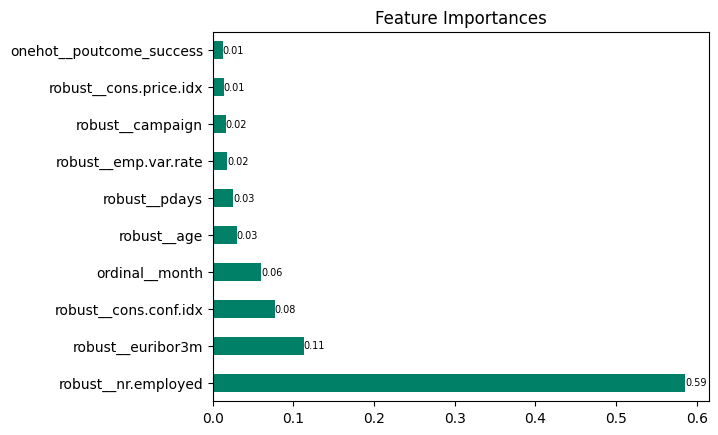

In [54]:
# Mencari feature importance pada best_model

coef1 = pd.Series(best_model["model"].feature_importances_, preprocessor.get_feature_names_out()).sort_values(ascending = False).head(10)
ax = coef1.plot(kind='barh', title='Feature Importances', colormap="summer")

for i, v in enumerate(coef1):
    ax.text(v, i, f'{v:.2f}', ha='left', va='center', size=7)

plt.show()

Dari grafik diatas dapat dilihat faktor yang mempengaruhi potensi nasabah menggunakan produk Term Deposit dari model machine learning yang kita buat. Fitur yang paling penting adalah ***"..."*** (*...*), ***"..."*** (*...*), dan ***"..."*** (*...*). Analisa berikutnya dapat ditingkatkan dengan melakukan *`feature selection`* atau kombinasi dari fitur-fitur yang paling berpengaruh untuk mengurangi kompleksitas model dan dibandingkan dengan model terbaik yang ada sekarang.

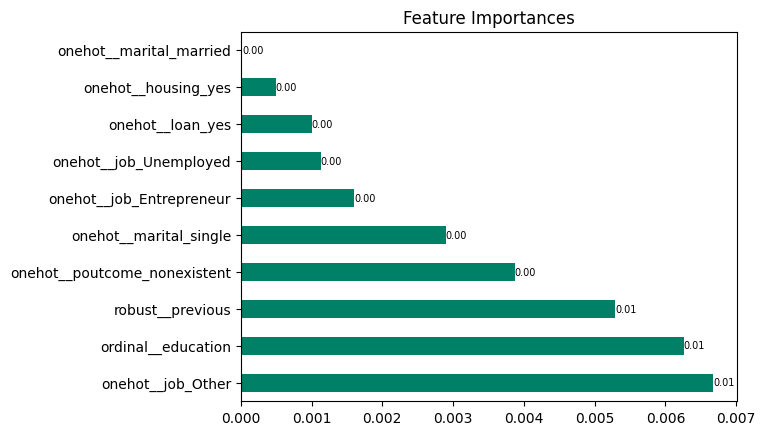

In [75]:
# Mencari fitur yang kurang berpengaruh terhadap model pada best_model

coef2 = pd.Series(best_model["model"].feature_importances_, preprocessor.get_feature_names_out()).sort_values(ascending = False).tail(10)
ax = coef2.plot(kind='barh', title='Feature Importances', colormap="summer")

for i, v in enumerate(coef2):
    ax.text(v, i, f'{v:.2f}', ha='left', va='center', size=7)

plt.show()

#### **3.5.2 SHAP**

In [55]:
# Mendapatkan semua fitur modeling

feature_names = preprocessor.get_feature_names_out()

In [56]:
# Melakukan fit_transform dan fit_resample dari best_model

X_train_1 = best_model[0].fit_transform(X_train)
X_train_2, y_train_2 = best_model[1].fit_resample(X_train_1,y_train)

 99%|===================| 44746/45300 [01:08<00:00]        

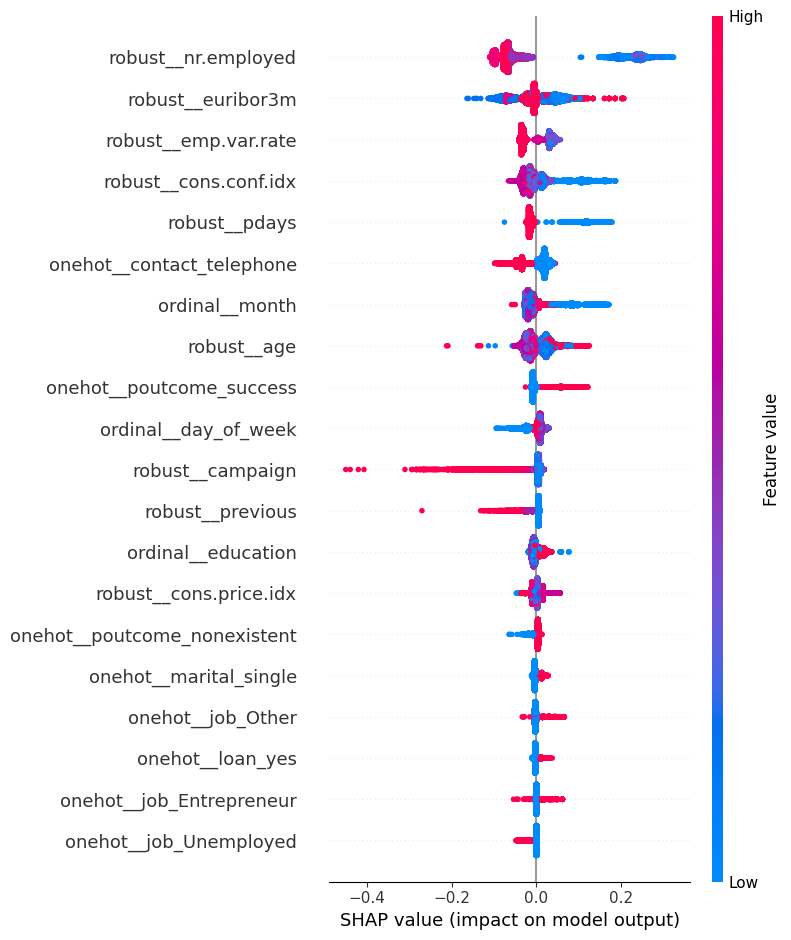

In [57]:
# SHAP Analysis

import shap

shap_values = shap.TreeExplainer(best_model[-1],
                                 data = X_train_2,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_train_2)
                                 
shap.summary_plot(shap_values, X_train_2,feature_names = feature_names)

### **3.6 Model-Based Features Selection**

Berdasarkan analisis Feature Importance dan SHAP, ditemukan bahwa kolom `previous`, `housing`, dan `loan` tidak berperan signifikan pada pemodelan. Hal ini juga sesuai dengan hasil data analysis dimana kolom `housing` dan `loan` yang telah dilakukan uji hipotesis menunjukkan bahwa kedua kolom tersebut tidak memiliki pengaruh yang signifikan terhadap target. Oleh karena itu, sekarang akan dicoba untuk menghapus kolom tersebut dan melihat performa best model :

In [76]:
# Melakukan drop pada kolom yang dianggap tidak signifikan

X_train_filtered = X_train.drop(columns=['previous','housing','loan'])
X_val_filtered = X_val.drop(columns=['previous','housing','loan'])

In [82]:
# Definisikan encoder dan scaler baru tanpa fitur yang dianggap tidak signifikan ('previous', 'housing', 'loan')

# One Hot Encoding filtered
onehot_features_filtered = ['contact', 'poutcome', 'job', 'marital']

# Ordinal Encoding filtered
ordinal_features_filtered = ['education', 'month', 'day_of_week']

# Numeric Scaling filtered
numeric_features_filtered  = df.describe().columns
numeric_features_filtered = numeric_features_filtered.drop(['Deposit', 'previous'])

In [83]:
# Membuat preprocessor baru tanpa fitur yang dianggap tidak signifikan ('previous', 'housing', 'loan')

preprocessor_filtered = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), onehot_features_filtered),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ordinal_features_filtered),
    ('robust', RobustScaler(), numeric_features_filtered)
], remainder='passthrough')

In [84]:
preprocessor_filtered

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['contact', 'poutcome', 'job', 'marital']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'education',
                                                          'data_type': dtype('O'),
                                                          'mapping': Primary Education      0
Secondary Education    1
Higher Education       2
Other                 -1
dtype: int64},
                                                         {'col': 'month',
                                                          'data_type': dtype('O'),
                                                          'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7
sep     8
oct     9
nov    10
dec    11
dtype: int64},
                                                         {'col': 'day_of_week',
                                                          'data_type': dtype('O'),
                                                          'mapping': mon    0
tue    1
wed    2
thu    3
fri    4
dtype: int64}]),
                                 ['education', 'month', 'day_of_week']),
                                ('robust', RobustScaler(),
                                 Index(['age', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])

In [85]:
# fit new final model to train set

final_model = Pipeline([
    ('preprocess', preprocessor_filtered),
    ('resampler', ros),
    ('model', best_model[-1])                
])

final_model.fit(X_train_filtered, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['contact', 'poutcome', 'job',
                                                   'marital']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Primary Education      0
Secondary Education    1
Higher Education       2
Other                 -1
dtype: int64},
                                                                          {'col': 'month',
                                                                           'data_type':...
tue    1
wed    2
thu    3
fri    4
dtype: int64}]),
                                                  ['education', 'month',
                                                   'day_of_week']),
                                                 ('robust', RobustScaler(),
                                                  Index(['age', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                ('resampler', RandomOverSampler(random_state=0)),
                ('model',
                 GradientBoostingClassifier(max_features=55, random_state=0,
                                            subsample=0.8))])

In [86]:
# Predit to test set untuk melihat peningkatan skornya

# predict
y_pred = final_model.predict(X_val_filtered)

# evaluate
score_filtered = roc_auc_score(y_val, y_pred)

# score before filterd
score_beforefiltered = list_score_aftertuned[0]

In [87]:
# Membandingkan score sebelum dan sesudah filterd fitur yang dianggap tidak signifikan ('previous', 'housing', 'loan')

data = {'best model': 'Gradient Boosting',
    'ROC_AUC (before filtered)' : score_beforefiltered,
    'ROC_AUC (filtered)': score_filtered
}

bandingscore_denganfiltered = pd.DataFrame([data]).set_index('best model', drop=True)
bandingscore_denganfiltered

,ROC_AUC (before filtered),ROC_AUC (filtered)
best model,,
Gradient Boosting,0.753503,0.753665


**Insight :**

Setelah kita hapus ketiga fitur tersebut (***previous***, ***housing***, ***loan***), didapatkan bahwa terdapat `pengurangan skor pada matriks ROC_AUC`. Tapi pengurangannya sangat tidak signifikan dari skor ketika kita masih menggunakan fitur-fitur tersebut. Oleh karena itu, mungkin pengurangan fitur ini dapat dipertimbangkan jika ternyata terbukti bahwa datanya sulit diperoleh, khususnya untuk kolom loan dan housing dimana terdapat banyak missing value.

## **`4. Evaluasi Model`**

Setelah itu kita akan membandingkan hasil sebelum tuned (***default***), dengan ***hasil tuned*** dalam **`df_unseen`**

Pertama kita akan bagi **`df_unseen`** menjadi **X_test** dan **y_test**

In [92]:
X_test = df_unseen.drop(columns='Deposit')
y_test = df_unseen['Deposit']

In [96]:
# Melihat perbandingan model dengan beforetunning dan hyperparameter tuning

# beforetunning
y_pred_beforetunning = pipe_gradboost.predict(X_test)
y_pred_proba_beforetunning = pipe_gradboost.predict_proba(X_test)

roc_auc_beforetunning = roc_auc_score(y_test, y_pred_proba_beforetunning[:,1])

print('ROC_AUC Score Before Tunning Gradient Boosting : ', roc_auc_beforetunning)

ROC_AUC Score Before Tunning Gradient Boosting :  0.7945301970208073


In [98]:
report = classification_report(y_test, y_pred_beforetunning)
print(report)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_beforetunning).ravel()
print(f"TN: {tn} | FP: {fp}\nFN: {fn}  | TP: {tp}")

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7078
           1       0.42      0.59      0.49       904

    accuracy                           0.86      7982
   macro avg       0.68      0.74      0.70      7982
weighted avg       0.88      0.86      0.87      7982

TN: 6345 | FP: 733
FN: 375  | TP: 529


Beberapa hal yang dapat disimpulkan yaitu:

Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunakan model Gradient Boosting yang sudah dibuat, model dapat mengetahui 59% nasabah yang ***menggunakan Term Deposit*** dan 90% nasabah yang ***tidak menggunakan Term Deposit*** berdasarkan ***Recall***. Selain itu model memiliki kemungkinan prediksi benar untuk nasabah yang akan menggunakan Term Deposit sebesar 42%. Maka masih ada nasabah yang menggunakan Term Deposit dan diprediksi sebagai tidak menggunakan Term Deposit sebesar 17%. 
  
Bila seandainya biaya marketing per orang 3.23 EUR dan potensi keuntungan yang diterima bank 51.02 EUR, dan terdapat 7,982 nasabah dimana nasabah yang menggunakan Term Deposit 904 orang dan yang tidak menggunakan Term Deposit 7,078 orang, maka kurang lebih perhitungannya adalah sebagai berikut:  
  
*Tanpa Model* (Perusahaan akan menghubungi campaign Term Deposit ke semua nasabah):
- Total nasabah => (6,345 + 733 + 375 + 529) = 7,982 nasabah
- Total nasabah ***menggunakan Term Deposit*** => (375 + 529) = 904 nasabah
- Biaya marketing => 3.23 EUR
- Potensi keuntungan => 51.02 EUR
- Total keuntungan yang didapat => (51.02 EUR * 904) - (3.23 EUR * 7,982) = 20.346,68 EUR

*Dengan Model* (Perusahaan akan menghubungi campaign Term Deposit ke nasabah yang terprediksi akan menggunakan Term Deposit):
- Nasabah yang terprediksi **benar-benar** menggunakan Term Deposit => 529 nasabah
- Nasabah yang terprediksi menggunakan Term Deposit => (375 + 529) = 904 nasabah
- Biaya marketing => 3.23 EUR
- Potensi keuntungan => 51.02 EUR
- Total keuntungan yang didapat => (51.02 EUR * 529) - (3.23 EUR * 904) = 24.069,66 EUR

Dari sini, kita dapat menyimpulkan bahwa dengan menggunakan machine learning, akan didapatkan peningkatan keuntungan sebesar 24.069,66 EUR - 20.346,68 EUR = `3.722,98 EUR`

Oleh karena itu, dapat disimpulkan bahwa menggunakan machine learning akan meningkatkan keuntungan perusahaan dibandingkan tanpa menggunakan machine learning. Kelebihan keuntungan tersebut bisa dialokasikan untuk keperluan bisnis bank yang lain agar keuntungannya bisa dipakai untuk lini bisnis yang lain dan dapat meningkatkan keuntungan perusahaan dengan lebih signifikan.

## **`5. Conclusion and Recommendation`**

### **4.1 Conclusion**

### **4.2 Recommendation**

## **6. Save Model**

In [ ]:
# Save model

# deposit_model = best_model.fit(X_train, y_train)
# pickle.dump(deposit_model, open('Model_final.sav', 'wb'))

In [ ]:
# Load model

# filename = 'Model_final.sav'
# loaded_model = pickle.load(open(filename, 'rb'))